In [417]:
import numpy as np 
import pandas as pd

In [418]:
df = pd.read_excel("flight_price.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [419]:
df.shape


(10683, 11)

In [420]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [421]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [422]:
# check for the null values.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [423]:
df.dropna(subset=["Route","Total_Stops"], inplace=True) #Looks at only the columns Route and Total_stops.Drops any row where either Route or Total_stops is NaN.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [424]:
# columnwise analysis
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [425]:
df["Airline"].unique() # tell all the unique values(name) of the airlines.

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [426]:
df["Airline"].value_counts() # count of each and every unique value.

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [427]:
df["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [428]:
df["Date_of_Journey"].str.split("/")

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [429]:
df["days"]=df["Date_of_Journey"].str.split("/").str[0].astype(int)
df["Month"]=df["Date_of_Journey"].str.split("/").str[1].astype(int)
df["Year"]=df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [430]:
del df["Date_of_Journey"]

In [431]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,days,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [432]:
df["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [433]:
df["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [434]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [435]:
del df["Route"] # it is of no use and does not effect the analysis.

In [436]:
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,days,Month,Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [437]:
df["Dep_Hour"]=df["Dep_Time"].str.split(":").str[0].astype("int")
df["Dep_Min"]=df["Dep_Time"].str.split(":").str[1].astype("int")
df

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,8,20
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30


In [438]:
del df["Dep_Time"]

In [439]:
df.head(10)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0
6,Jet Airways,Banglore,New Delhi,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55
7,Jet Airways,Banglore,New Delhi,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019,8,0
8,Jet Airways,Banglore,New Delhi,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55
9,Multiple carriers,Delhi,Cochin,19:15,7h 50m,1 stop,No info,8625,27,5,2019,11,25


In [440]:
df["Arrival_Hour"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0].astype("int")
df["Arrival_Min"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1].astype("int")
df

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,22,25
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,14,10


In [441]:
del df["Arrival_Time"]

In [442]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [443]:
df["Duration"].unique() # so we see that the data is not uniform some values have only hours or minutes.

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [444]:
df["Duration"]=df["Duration"].replace("5m","0h 5m")
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [445]:
df["Duration_hours"]=df["Duration"].str.split(" ").str[0].str.split("h").str[0].astype("int")*60

In [446]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,120
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,420
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,300
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,240


In [447]:
df["Duration_mins"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0].fillna(0).astype("int")

In [448]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,120,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,420,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,1140,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,300,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,240,45


In [449]:
del df["Duration"]

In [450]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,120,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,420,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,300,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,240,45


In [451]:
df["Total_Duration"]=df["Duration_hours"]+df["Duration_mins"]

In [452]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,120,50,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,420,25,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140,0,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,300,25,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,240,45,285


In [453]:
del df["Duration_hours"]

In [454]:
del df["Duration_mins"]

In [455]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [456]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [457]:
df["Total_Stops"]=df["Total_Stops"].replace("0 stops","0")
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,21,35,285


In [458]:
df["Total_Stops"]=df["Total_Stops"].replace("1 stop","1")
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,285


In [459]:
df["Total_Stops"]=df["Total_Stops"].replace("2 stops","2")
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,285


In [460]:
df["Total_Stops"]=df["Total_Stops"].replace("3 stops","3")
df["Total_Stops"]=df["Total_Stops"].replace("4 stops","4")
del df["Additional_Info"]
df

,Airline,Source,Destination,Total_Stops,Price,days,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,2019,19,55,22,25,150
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,2019,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,2019,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,2019,11,30,14,10,160


In [461]:
import matplotlib.pyplot as plt
import seaborn as sns

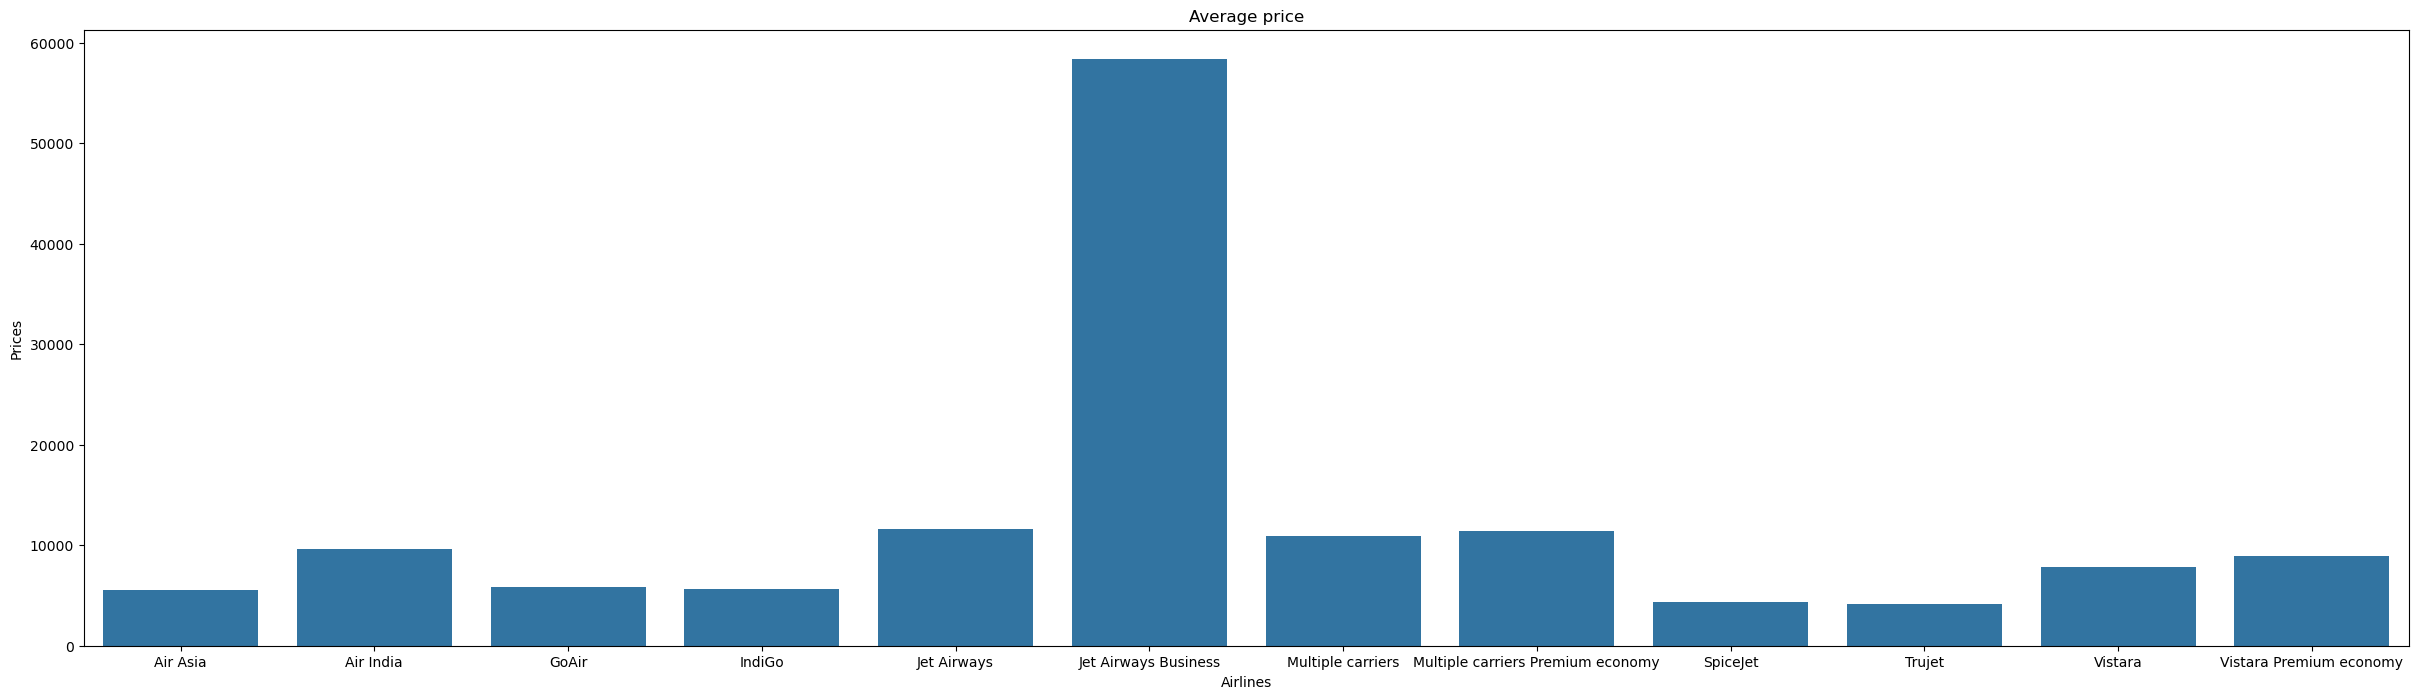

In [462]:
#compare the mean price of every airlines.
mean_price=df.groupby("Airline")["Price"].mean()
plt.figure(figsize=(30,8))
sns.barplot(x=mean_price.index,y=mean_price.values)
plt.title("Average price")
plt.xlabel("Airlines")
plt.ylabel("Prices")
plt.show()

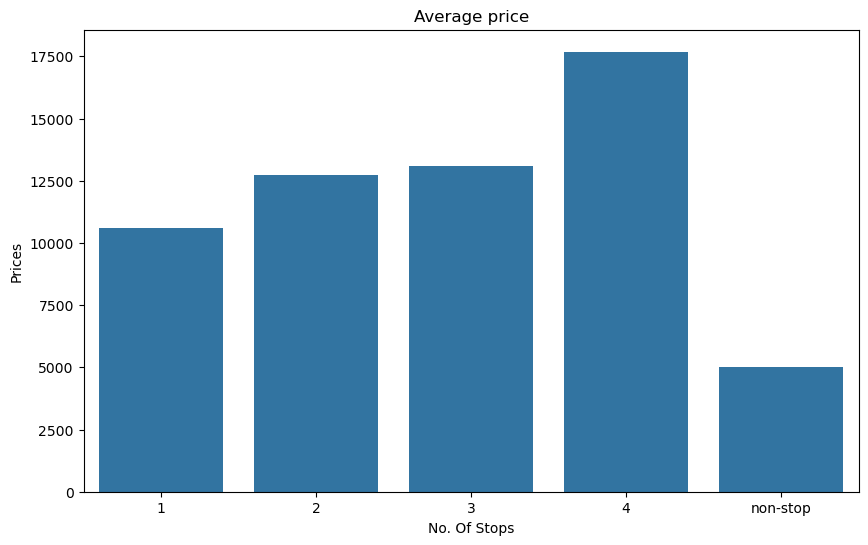

In [463]:
#Avg price v/s no. of stops
avg_price=df.groupby("Total_Stops")["Price"].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=avg_price.index,y=avg_price.values)
plt.title("Average price")
plt.xlabel("No. Of Stops")
plt.ylabel("Prices")
plt.show()

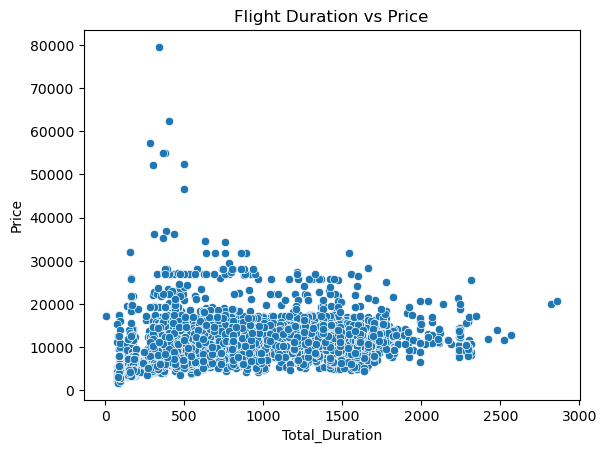

In [464]:
# Duration v/s price.
sns.scatterplot(x="Total_Duration", y="Price", data=df)
plt.title("Flight Duration vs Price")
plt.show()

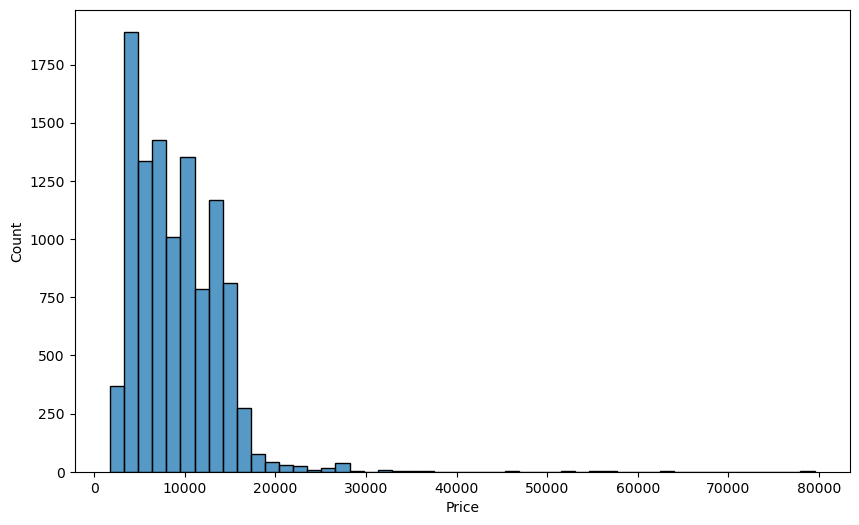

In [465]:
# Distribution of prices.
plt.figure(figsize=(10,6))
sns.histplot(df["Price"],bins=50)
plt.show()

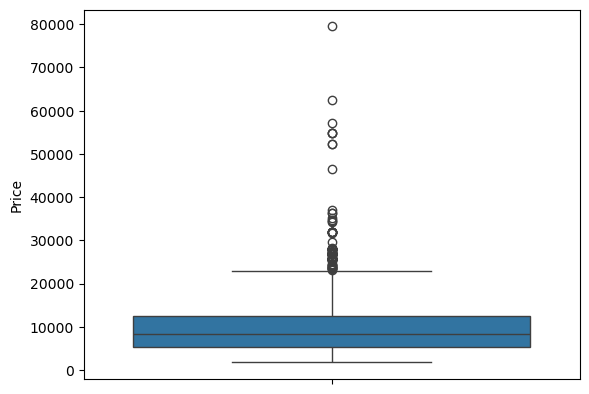

In [466]:
# Outlier in data
sns.boxplot(df["Price"])
plt.show()